<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/testovoe_WSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Замените 'your_file.csv' на путь к вашему файлу
df = pd.read_csv('38.csv')

# Проверка первых строк для уверенности, что данные загружены правильно
df.head()

date_time_clouds  clouds  insolation_value  power_value  \
0  2021-01-01 08:00:00   0.291          2.719515     0.510000   
1  2021-01-01 09:00:00   0.299         26.143628     2.280000   
2  2021-01-01 10:00:00   0.291         52.785677     4.556000   
3  2021-01-01 11:00:00   0.291        112.734060    11.151290   
4  2021-01-01 12:00:00   0.292        222.726500    26.058584   

   minutes_of_daylight  part_of_the_daylight  morning  afternoon  evening  \
0                530.0              0.018868        1          0        0   
1                530.0              0.132075        1          0        0   
2                530.0              0.245283        1          0        0   
3                530.0              0.358491        0          1        0   
4                530.0              0.471698        0          1        0   

       angle   altitude  month  insolation_max  insolation_ratio  \
0 -23.011637   0.601486      1        3.877965          0.701274   
1 -23.011637   8.716971      1      126.001728          0.207486   
2 -23.011637  15.272744      1      259.056565          0.203761   
3 -23.011637  19.782853      1      359.199595          0.313848   
4 -23.011637  21.812232      1      405.681435          0.549018   

   cloud_insolation_product  cloud_altitude_product  max_power  power_ratio  
0                  1.128488                0.175032   2.094194     0.243530  
1                 37.674517                2.606374  29.968810     0.076079  
2                 75.385460                4.444369  51.993808     0.087626  
3                104.527082                5.756810  66.750809     0.167059  
4                118.458979                6.369172  73.258227     0.355709

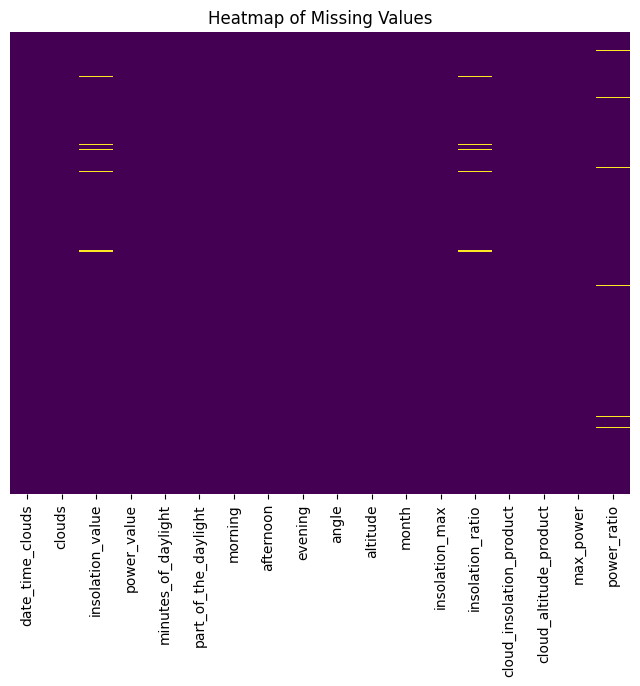

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Построение тепловой карты пропусков
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time_clouds          14560 non-null  object 
 1   clouds                    14560 non-null  float64
 2   insolation_value          14376 non-null  float64
 3   power_value               14560 non-null  float64
 4   minutes_of_daylight       14560 non-null  float64
 5   part_of_the_daylight      14560 non-null  float64
 6   morning                   14560 non-null  int64  
 7   afternoon                 14560 non-null  int64  
 8   evening                   14560 non-null  int64  
 9   angle                     14560 non-null  float64
 10  altitude                  14560 non-null  float64
 11  month                     14560 non-null  int64  
 12  insolation_max            14560 non-null  float64
 13  insolation_ratio          14376 non-null  float64
 14  cloud_

In [9]:
# Рассчитаем процент пропусков для каждого столбца
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Оставим только столбцы с пропусками
missing_percentage.name='Percent_nan'
missing_percentage

insolation_value    1.263736
insolation_ratio    1.263736
power_ratio         1.153846
Name: Percent_nan, dtype: float64

In [11]:
# Удаление строк с пропусками из датафрейма
df = df.dropna().copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14211 entries, 0 to 14559
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time_clouds          14211 non-null  object 
 1   clouds                    14211 non-null  float64
 2   insolation_value          14211 non-null  float64
 3   power_value               14211 non-null  float64
 4   minutes_of_daylight       14211 non-null  float64
 5   part_of_the_daylight      14211 non-null  float64
 6   morning                   14211 non-null  int64  
 7   afternoon                 14211 non-null  int64  
 8   evening                   14211 non-null  int64  
 9   angle                     14211 non-null  float64
 10  altitude                  14211 non-null  float64
 11  month                     14211 non-null  int64  
 12  insolation_max            14211 non-null  float64
 13  insolation_ratio          14211 non-null  float64
 14  cloud_insol

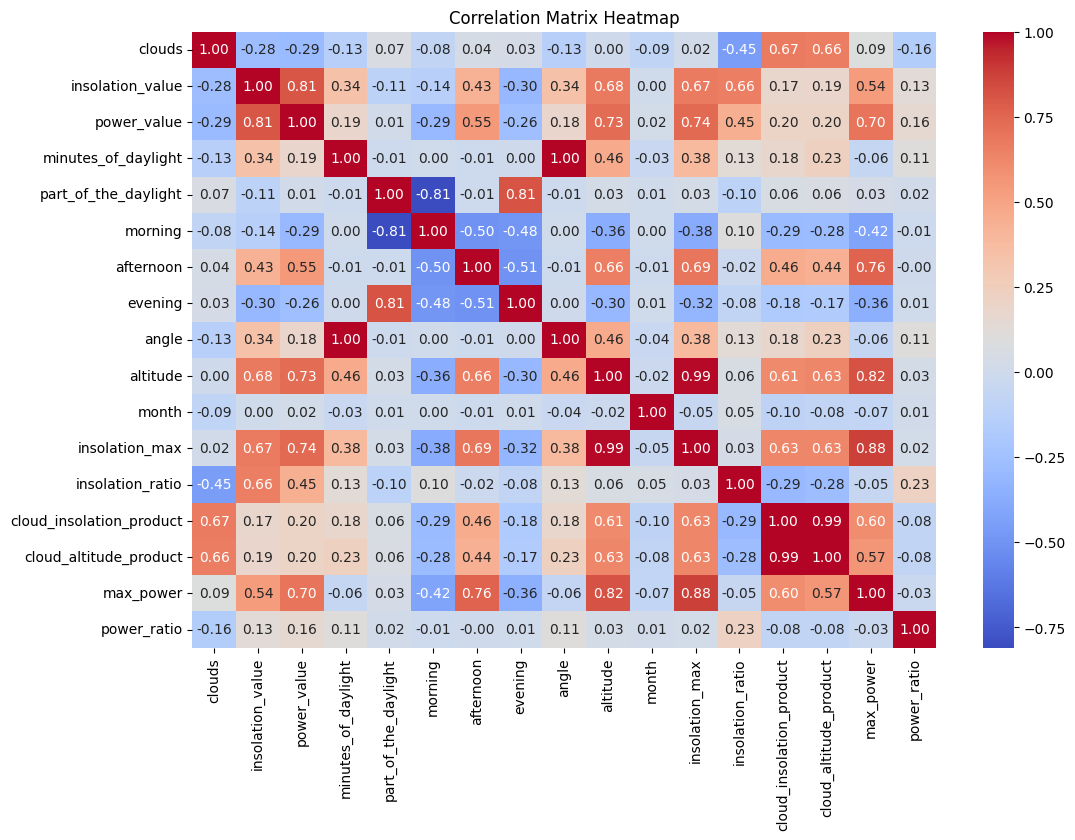

In [16]:
# Исключаем нечисловые столбцы перед вычислением корреляции
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


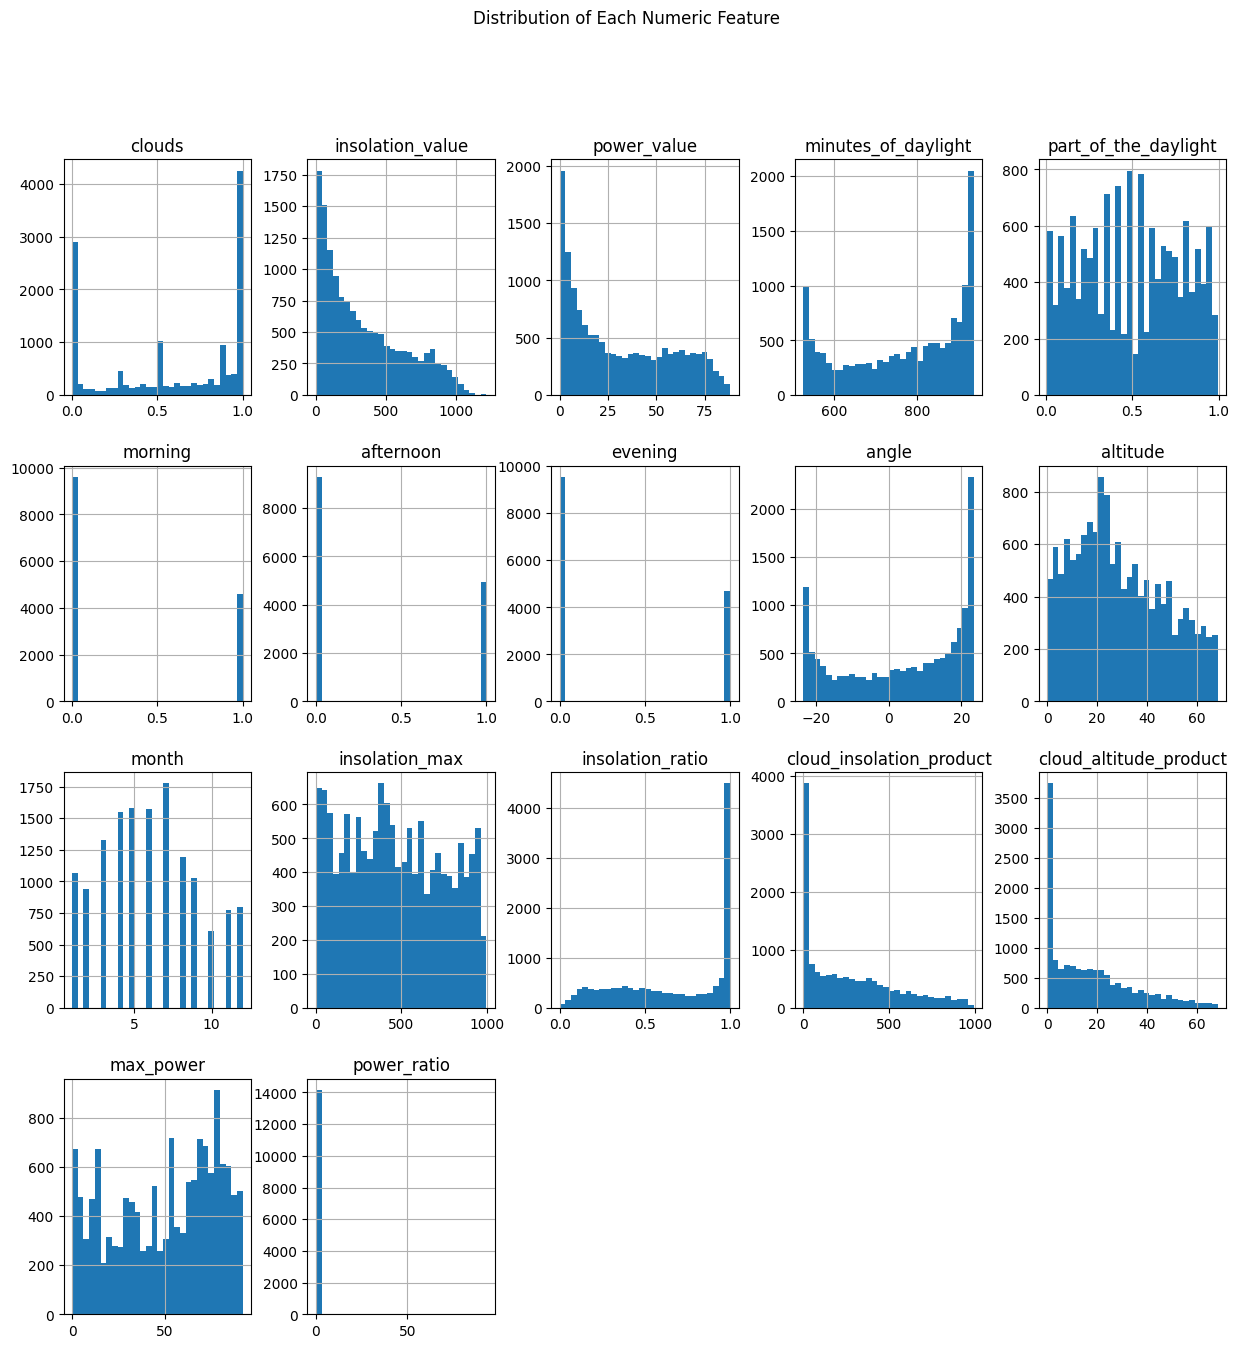

In [17]:
import matplotlib.pyplot as plt

# Построение распределения для каждой колонки
numeric_df.hist(bins=30, figsize=(15, 15), layout=(int(len(numeric_df.columns) ** 0.5), -1))
plt.suptitle("Distribution of Each Numeric Feature")
plt.show()


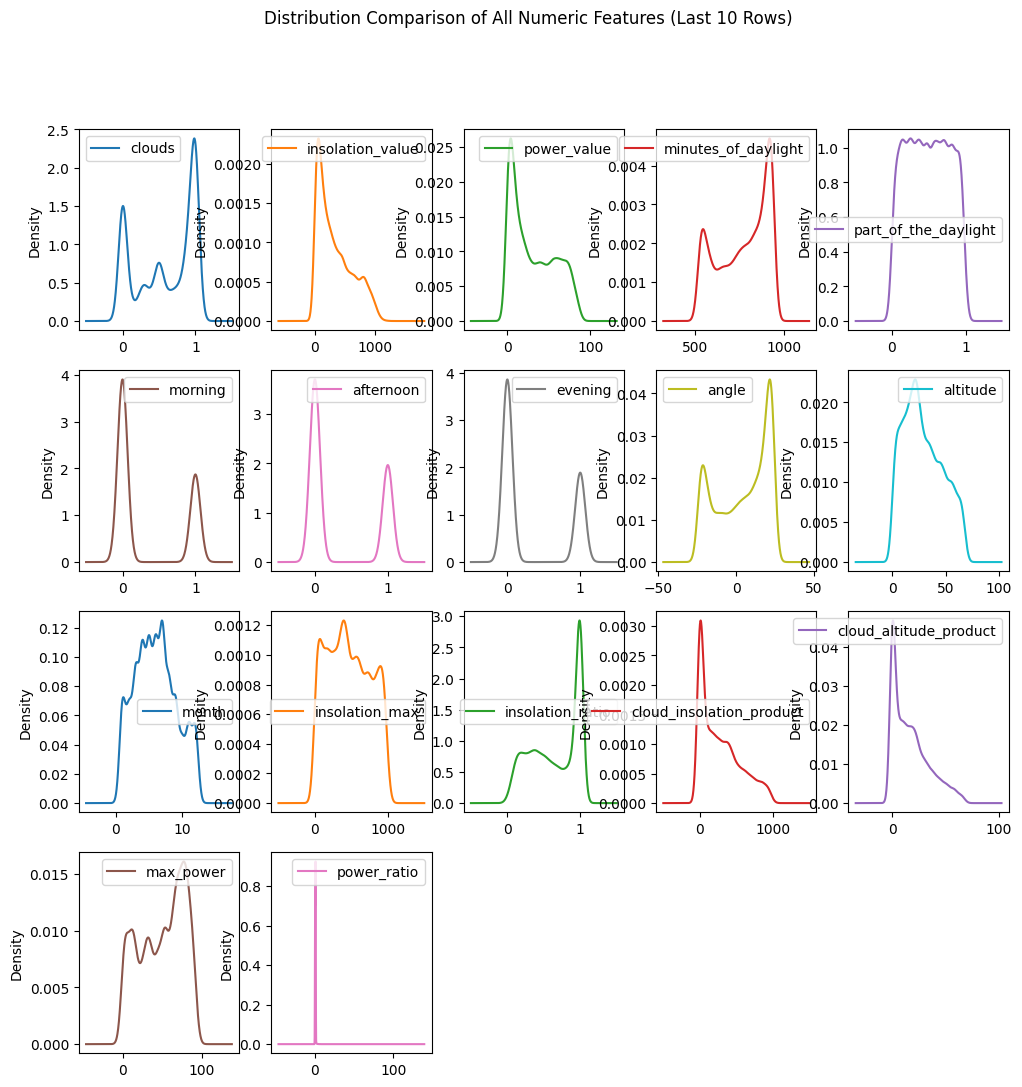

In [31]:
# Построение распределения (гистограмм) для всех числовых признаков для последних 10 строк
# numeric_features = last_year_df.select_dtypes(include=['number'])

numeric_df.plot(kind='kde', subplots=True, layout=(int(len(numeric_df.columns) ** 0.5), -1), figsize=(12, 12), sharex=False)
plt.suptitle("Distribution Comparison of All Numeric Features (Last 10 Rows)")
plt.show()


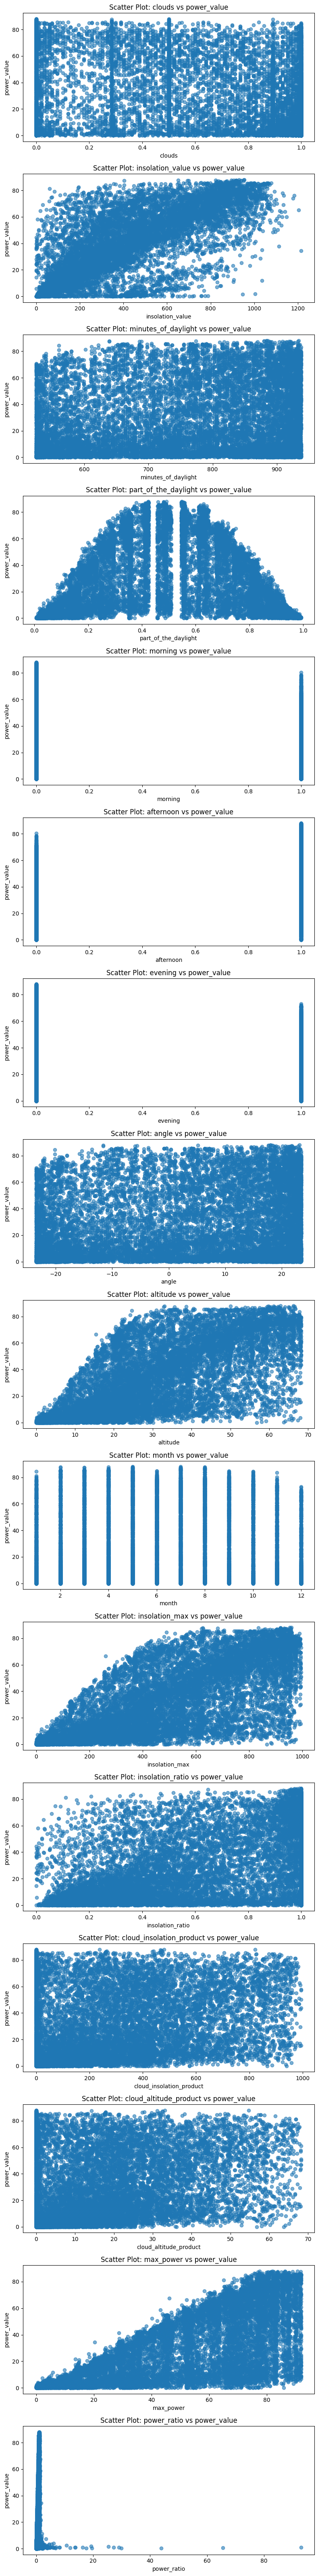

In [18]:
import matplotlib.pyplot as plt

# Построение scatter-графиков между всеми колонками и колонкой 'power_value'
target_column = 'power_value'
features = numeric_df.columns.drop(target_column)

# Создаем сетку scatter-графиков
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4 * len(features)))

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target_column], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_column)
    axes[i].set_title(f'Scatter Plot: {feature} vs {target_column}')

plt.tight_layout()
plt.show()


In [32]:
# # Преобразование колонки 'date_time_clouds' в формат даты и времени
# df['date_time_clouds'] = pd.to_datetime(df['date_time_clouds'])
# # Фильтрация данных за последний год на основе колонки 'date_time_clouds'
# last_year_df = df[df['date_time_clouds'] >= (df['date_time_clouds'].max() - pd.DateOffset(years=1))]
# last_year_df


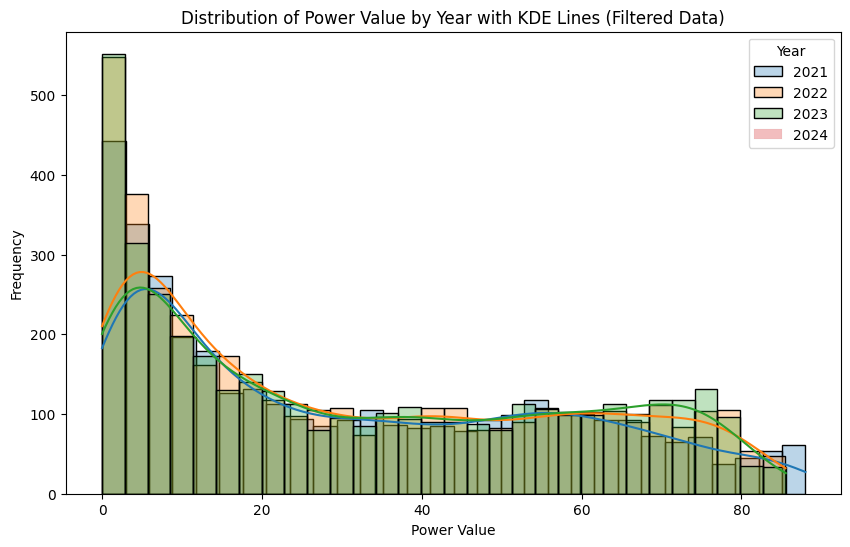

In [40]:
# Фильтрация данных с 2021-01-01 08:00:00 по 2024-01-01 08:00:00
filtered_df = df[(df['date_time_clouds'] >= '2021-01-01 08:00:00') & (df['date_time_clouds'] <= '2024-01-01 08:00:00')]

# Построение гистограммы и KDE для 'power_value' по годам с улучшенными цветами для отфильтрованных данных
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", n_colors=len(filtered_df['year'].unique()))

for i, year in enumerate(filtered_df['year'].unique()):
    sns.histplot(filtered_df[filtered_df['year'] == year]['power_value'], bins=30, kde=True, label=year, alpha=0.3, color=palette[i])

plt.xlabel('Power Value')
plt.ylabel('Frequency')
plt.title('Distribution of Power Value by Year with KDE Lines (Filtered Data)')
plt.legend(title='Year')
plt.show()


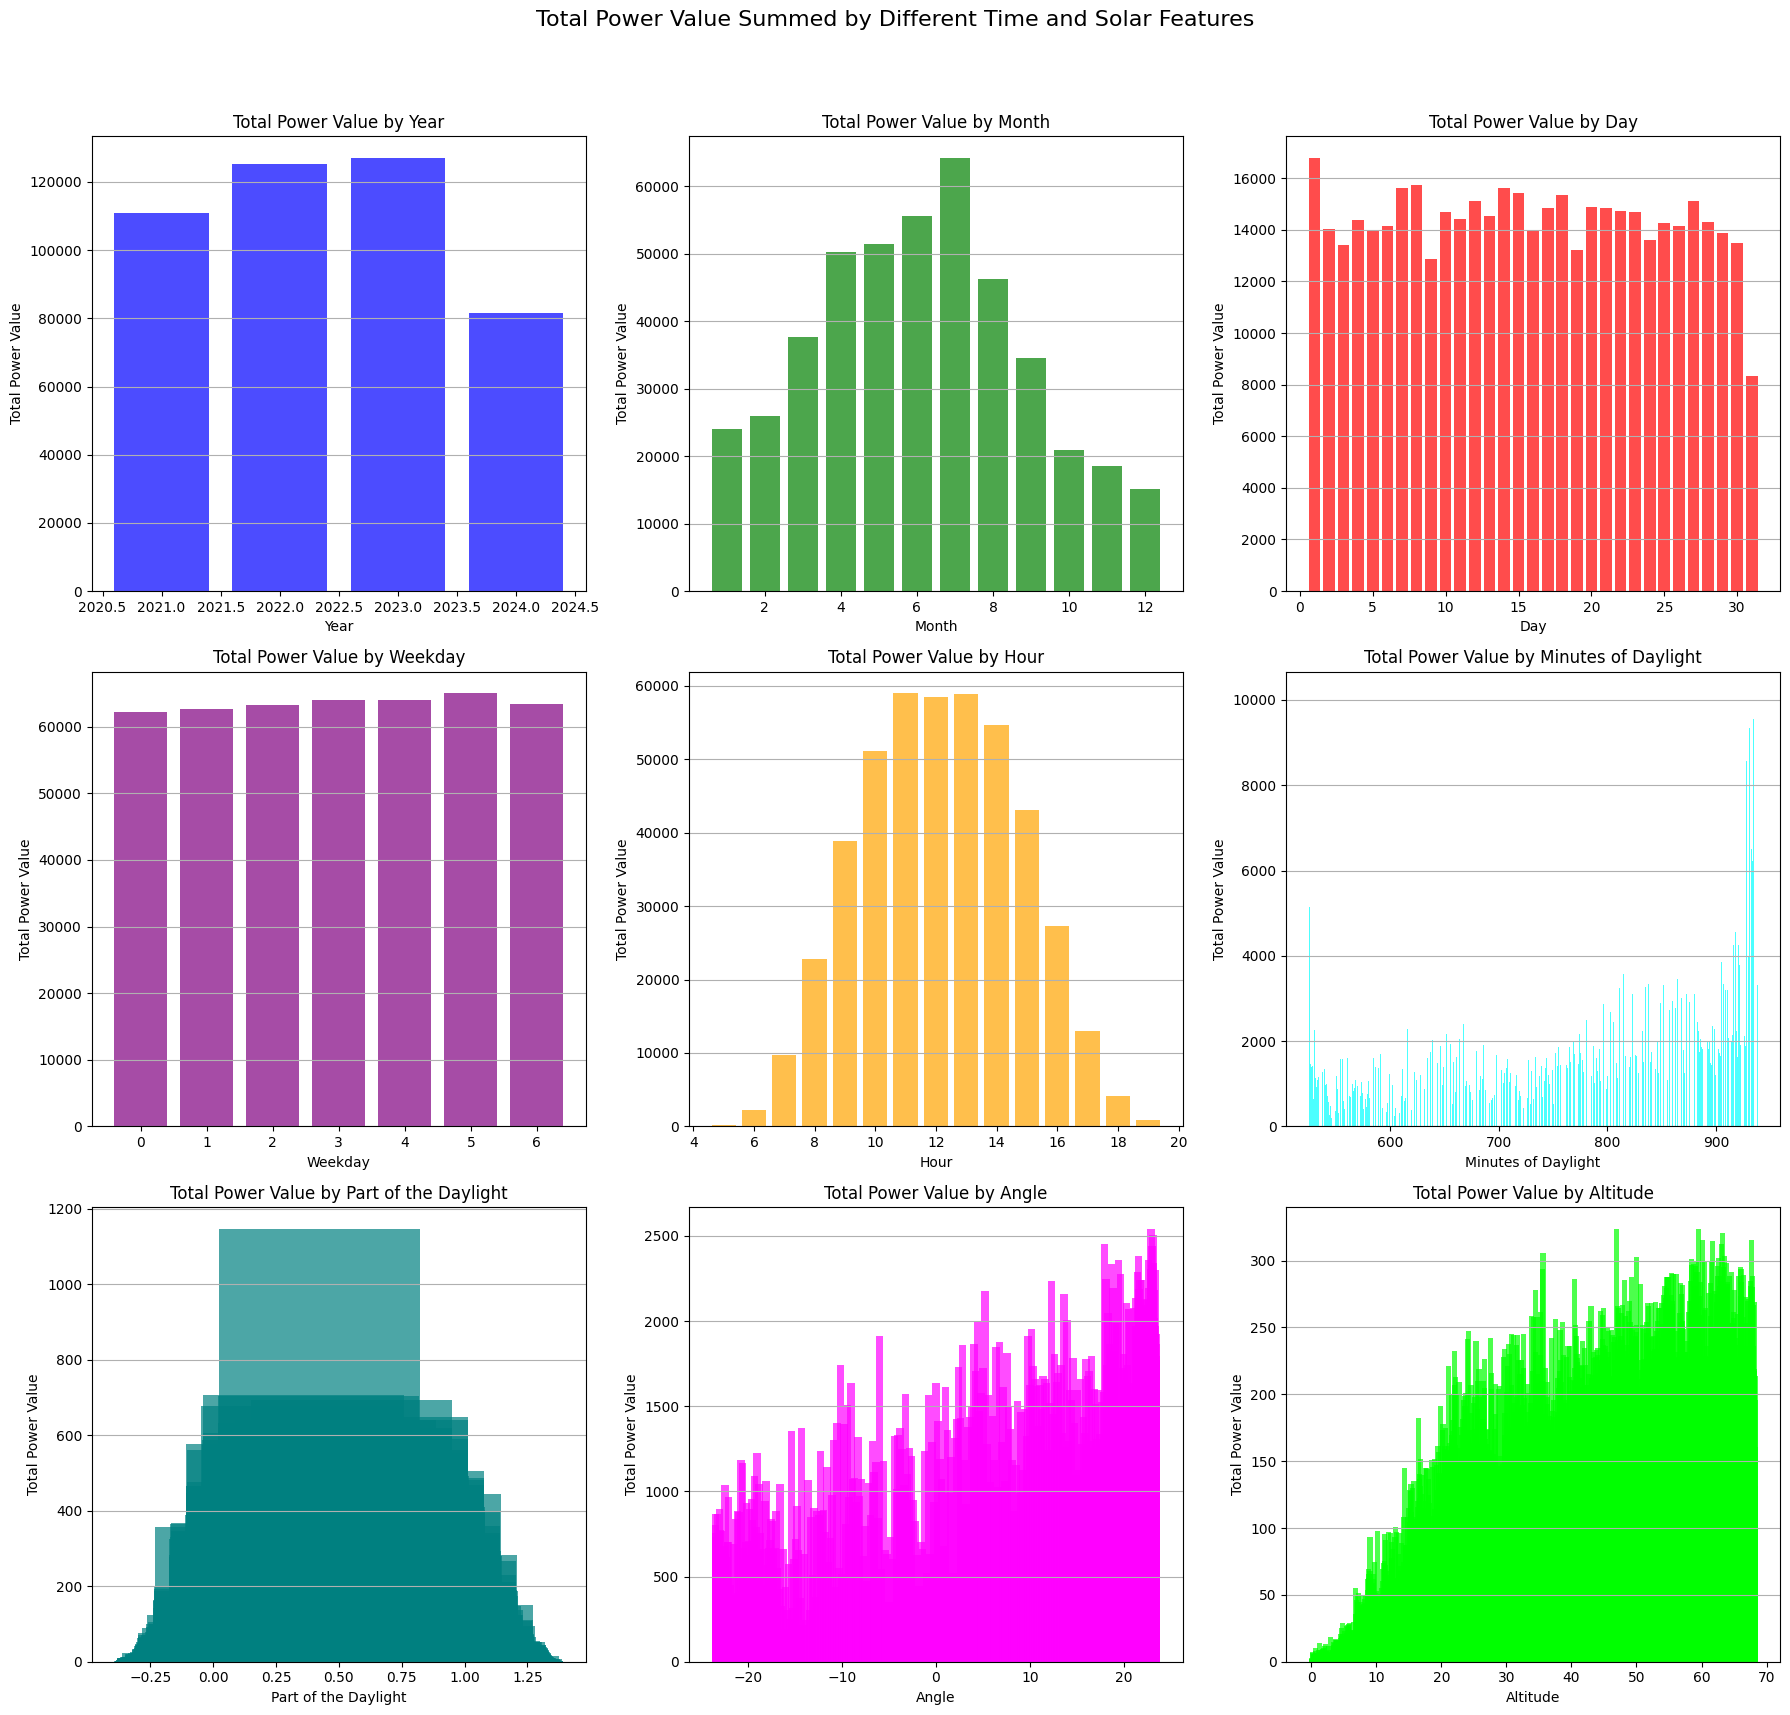

In [49]:
import matplotlib.pyplot as plt

# Суммирование значений 'power_value' по различным временным колонкам
sum_by_year = df.groupby('year')['power_value'].sum()
sum_by_month = df.groupby('month')['power_value'].sum()
sum_by_day = df.groupby('day')['power_value'].sum()
sum_by_weekday = df.groupby('weekday')['power_value'].sum()
sum_by_hour = df.groupby('hour')['power_value'].sum()
# Суммирование значений 'power_value' по минутам дневного света
sum_by_minutes_of_daylight = df.groupby('minutes_of_daylight')['power_value'].sum()
# Суммирование значений 'power_value' по part_of_the_daylight, angle, и altitude
sum_by_part_of_the_daylight = df.groupby('part_of_the_daylight')['power_value'].sum()
sum_by_angle = df.groupby('angle')['power_value'].sum()
sum_by_altitude = df.groupby('altitude')['power_value'].sum()


# Перестройка фигуры для добавления новых графиков
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Total Power Value Summed by Different Time and Solar Features", fontsize=16)

# График для года
axs[0, 0].bar(sum_by_year.index, sum_by_year.values, color='b', alpha=0.7)
axs[0, 0].set_title('Total Power Value by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Total Power Value')
axs[0, 0].grid(axis='y')

# График для месяца
axs[0, 1].bar(sum_by_month.index, sum_by_month.values, color='g', alpha=0.7)
axs[0, 1].set_title('Total Power Value by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Power Value')
axs[0, 1].grid(axis='y')

# График для дня
axs[0, 2].bar(sum_by_day.index, sum_by_day.values, color='r', alpha=0.7)
axs[0, 2].set_title('Total Power Value by Day')
axs[0, 2].set_xlabel('Day')
axs[0, 2].set_ylabel('Total Power Value')
axs[0, 2].grid(axis='y')

# График для дня недели
axs[1, 0].bar(sum_by_weekday.index, sum_by_weekday.values, color='purple', alpha=0.7)
axs[1, 0].set_title('Total Power Value by Weekday')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Total Power Value')
axs[1, 0].grid(axis='y')

# График для часа
axs[1, 1].bar(sum_by_hour.index, sum_by_hour.values, color='orange', alpha=0.7)
axs[1, 1].set_title('Total Power Value by Hour')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Total Power Value')
axs[1, 1].grid(axis='y')

# График для минут дневного света
axs[1, 2].bar(sum_by_minutes_of_daylight.index, sum_by_minutes_of_daylight.values, color='cyan', alpha=0.7)
axs[1, 2].set_title('Total Power Value by Minutes of Daylight')
axs[1, 2].set_xlabel('Minutes of Daylight')
axs[1, 2].set_ylabel('Total Power Value')
axs[1, 2].grid(axis='y')

# График для части дня
axs[2, 0].bar(sum_by_part_of_the_daylight.index, sum_by_part_of_the_daylight.values, color='teal', alpha=0.7)
axs[2, 0].set_title('Total Power Value by Part of the Daylight')
axs[2, 0].set_xlabel('Part of the Daylight')
axs[2, 0].set_ylabel('Total Power Value')
axs[2, 0].grid(axis='y')

# График для угла
axs[2, 1].bar(sum_by_angle.index, sum_by_angle.values, color='magenta', alpha=0.7)
axs[2, 1].set_title('Total Power Value by Angle')
axs[2, 1].set_xlabel('Angle')
axs[2, 1].set_ylabel('Total Power Value')
axs[2, 1].grid(axis='y')

# График для высоты
axs[2, 2].bar(sum_by_altitude.index, sum_by_altitude.values, color='lime', alpha=0.7)
axs[2, 2].set_title('Total Power Value by Altitude')
axs[2, 2].set_xlabel('Altitude')
axs[2, 2].set_ylabel('Total Power Value')
axs[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

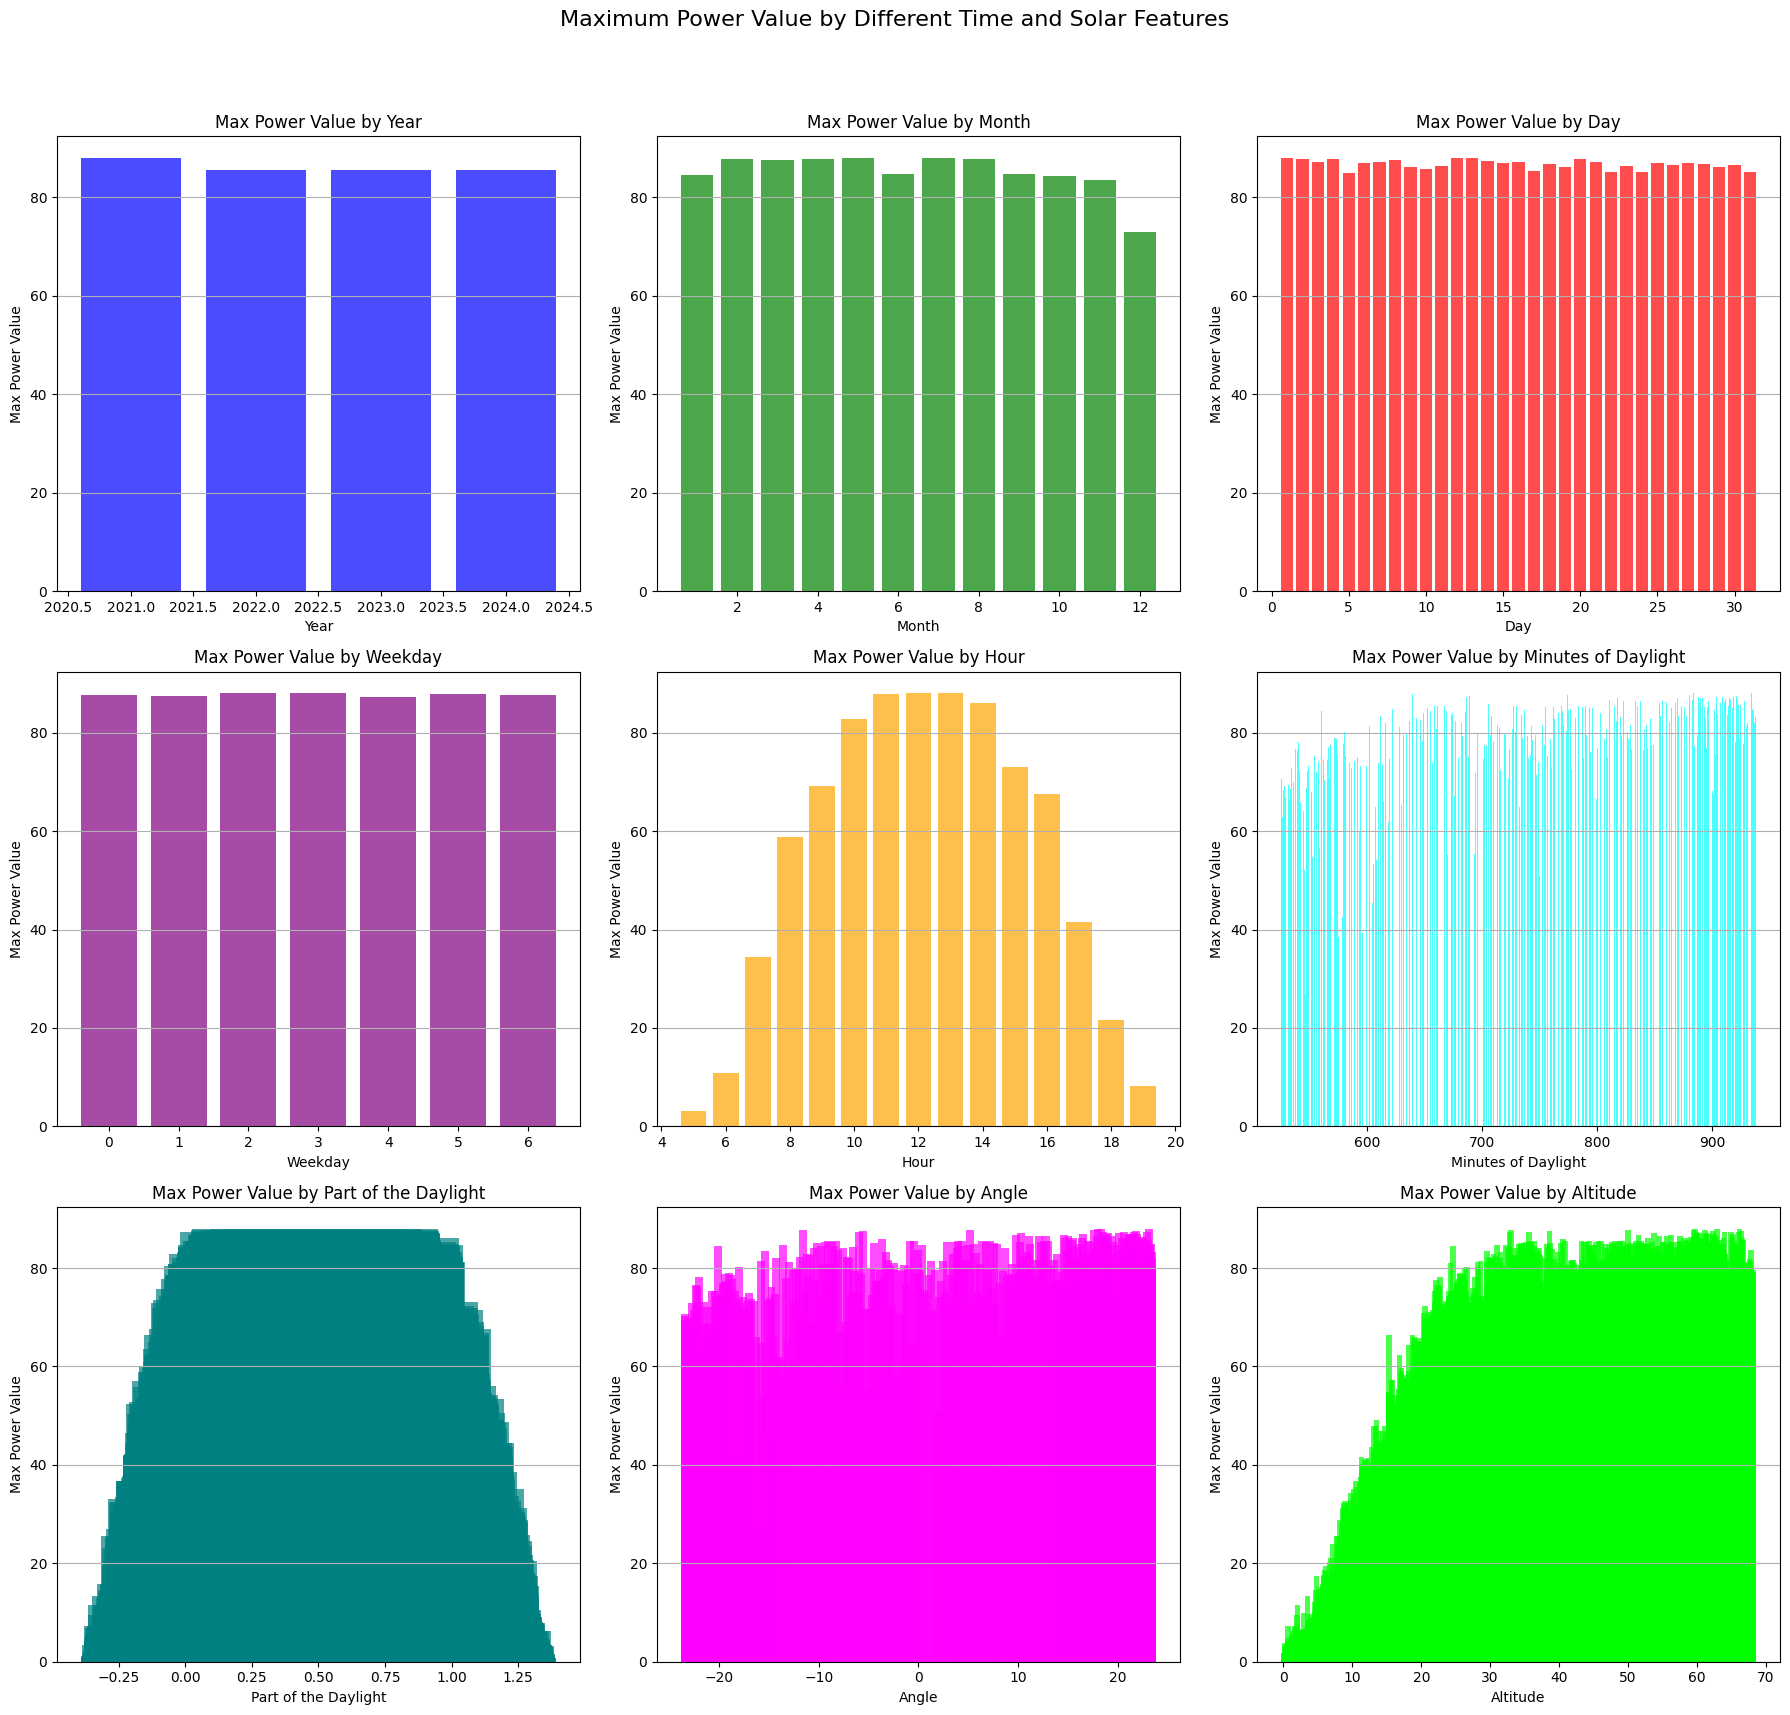

In [50]:
# Максимальные значения 'power_value' по временным и солнечным колонкам
max_by_year = df.groupby('year')['power_value'].max()
max_by_month = df.groupby('month')['power_value'].max()
max_by_day = df.groupby('day')['power_value'].max()
max_by_weekday = df.groupby('weekday')['power_value'].max()
max_by_hour = df.groupby('hour')['power_value'].max()
max_by_minutes_of_daylight = df.groupby('minutes_of_daylight')['power_value'].max()
max_by_part_of_the_daylight = df.groupby('part_of_the_daylight')['power_value'].max()
max_by_angle = df.groupby('angle')['power_value'].max()
max_by_altitude = df.groupby('altitude')['power_value'].max()

# Построение графиков максимальных значений
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Maximum Power Value by Different Time and Solar Features", fontsize=16)

# График для года
axs[0, 0].bar(max_by_year.index, max_by_year.values, color='b', alpha=0.7)
axs[0, 0].set_title('Max Power Value by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Max Power Value')
axs[0, 0].grid(axis='y')

# График для месяца
axs[0, 1].bar(max_by_month.index, max_by_month.values, color='g', alpha=0.7)
axs[0, 1].set_title('Max Power Value by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Max Power Value')
axs[0, 1].grid(axis='y')

# График для дня
axs[0, 2].bar(max_by_day.index, max_by_day.values, color='r', alpha=0.7)
axs[0, 2].set_title('Max Power Value by Day')
axs[0, 2].set_xlabel('Day')
axs[0, 2].set_ylabel('Max Power Value')
axs[0, 2].grid(axis='y')

# График для дня недели
axs[1, 0].bar(max_by_weekday.index, max_by_weekday.values, color='purple', alpha=0.7)
axs[1, 0].set_title('Max Power Value by Weekday')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Max Power Value')
axs[1, 0].grid(axis='y')

# График для часа
axs[1, 1].bar(max_by_hour.index, max_by_hour.values, color='orange', alpha=0.7)
axs[1, 1].set_title('Max Power Value by Hour')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Max Power Value')
axs[1, 1].grid(axis='y')

# График для минут дневного света
axs[1, 2].bar(max_by_minutes_of_daylight.index, max_by_minutes_of_daylight.values, color='cyan', alpha=0.7)
axs[1, 2].set_title('Max Power Value by Minutes of Daylight')
axs[1, 2].set_xlabel('Minutes of Daylight')
axs[1, 2].set_ylabel('Max Power Value')
axs[1, 2].grid(axis='y')

# График для части дня
axs[2, 0].bar(max_by_part_of_the_daylight.index, max_by_part_of_the_daylight.values, color='teal', alpha=0.7)
axs[2, 0].set_title('Max Power Value by Part of the Daylight')
axs[2, 0].set_xlabel('Part of the Daylight')
axs[2, 0].set_ylabel('Max Power Value')
axs[2, 0].grid(axis='y')

# График для угла
axs[2, 1].bar(max_by_angle.index, max_by_angle.values, color='magenta', alpha=0.7)
axs[2, 1].set_title('Max Power Value by Angle')
axs[2, 1].set_xlabel('Angle')
axs[2, 1].set_ylabel('Max Power Value')
axs[2, 1].grid(axis='y')

# График для высоты
axs[2, 2].bar(max_by_altitude.index, max_by_altitude.values, color='lime', alpha=0.7)
axs[2, 2].set_title('Max Power Value by Altitude')
axs[2, 2].set_xlabel('Altitude')
axs[2, 2].set_ylabel('Max Power Value')
axs[2, 2].grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
